In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#IMPORT DATA
scores_df = pd.read_csv("final_combined_DATA_scores.csv")
income_df = pd.read_csv("bank_net_income_2024.csv")

In [17]:
# Merge scores and income
merged_df = pd.merge(scores_df, income_df, on="bank_name")

# Define subcategories
subcategories = ['Data', 'Analytics', 'Technology', 'Analog']

# Perform regression calibration
calibrated_scores = {}

for sub in subcategories:
    sub_df = merged_df[merged_df['sub_category'] == sub].copy()
    X = sm.add_constant(sub_df['2024 Net Income'])
    y = sub_df['final_score']

    model = sm.OLS(y, X).fit()
    sub_df[f'{sub}_calibrated_score'] = model.predict(X)

    calibrated_scores[sub] = sub_df[['bank_name', f'{sub}_calibrated_score']].set_index('bank_name')

# Combine calibrated scores
result_df = pd.concat(calibrated_scores.values(), axis=1).reset_index()

# Export to CSV
output_path = "calibrated_ILB_scores_FINAL.csv"
result_df.to_csv(output_path, index=False)

print(f"Calibrated scores exported to: {output_path}")


Calibrated scores exported to: calibrated_ILB_scores_FINAL.csv


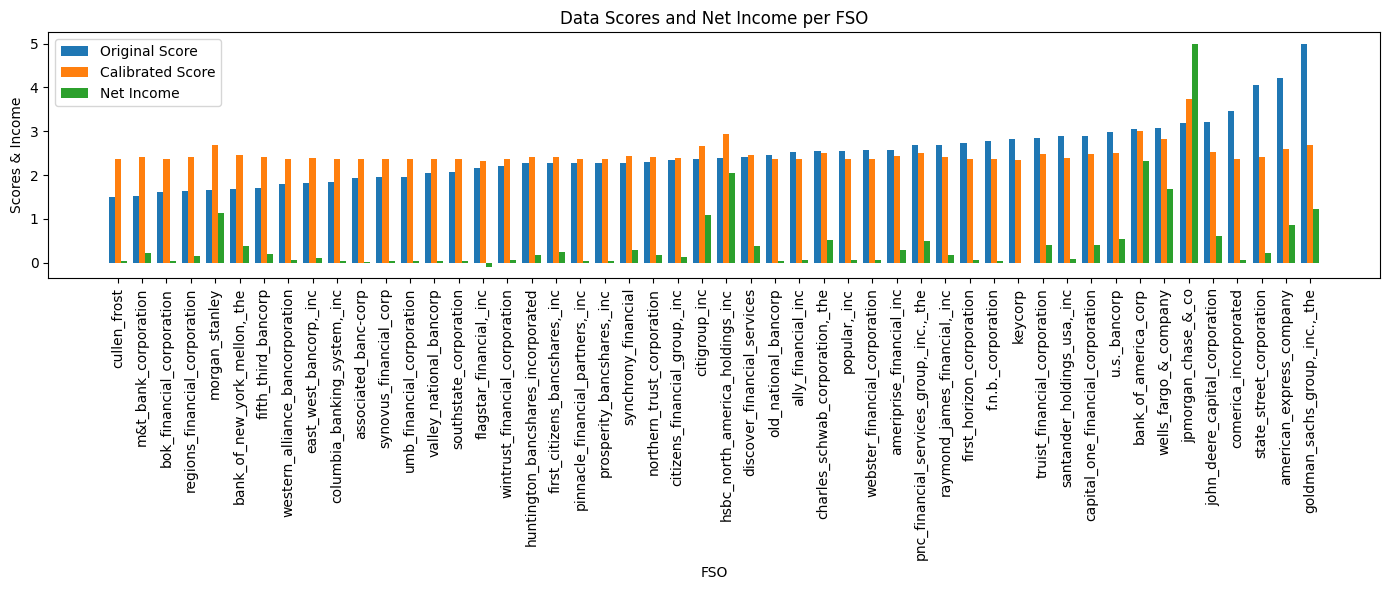

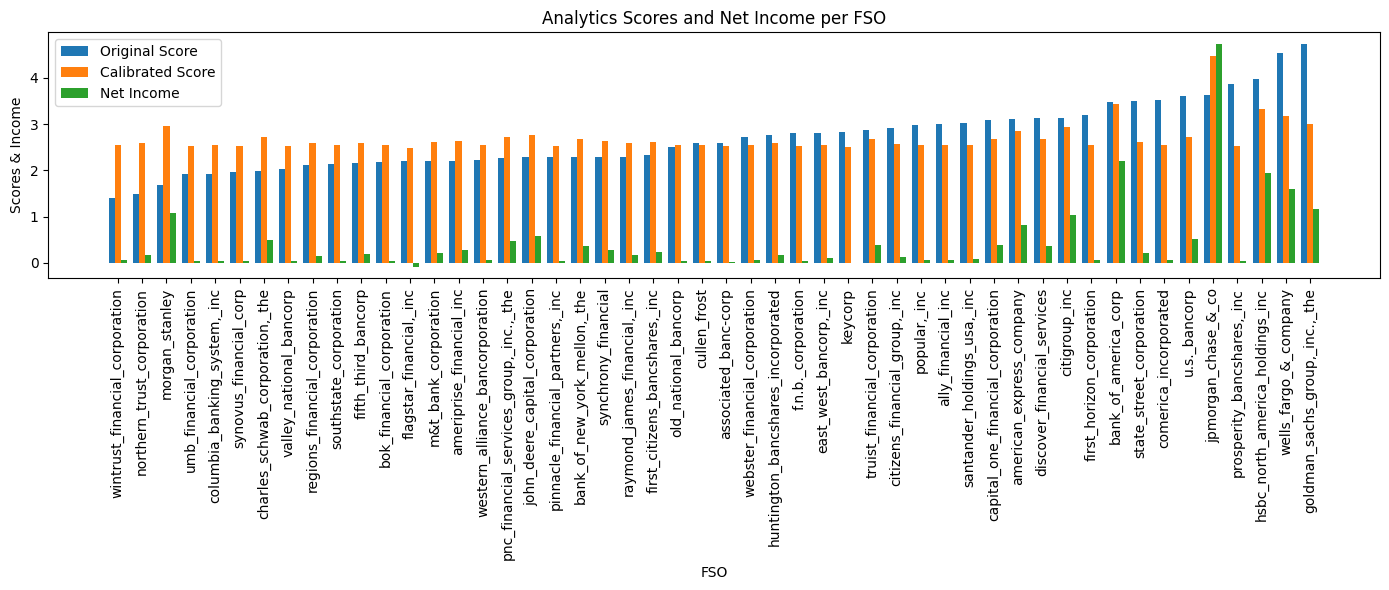

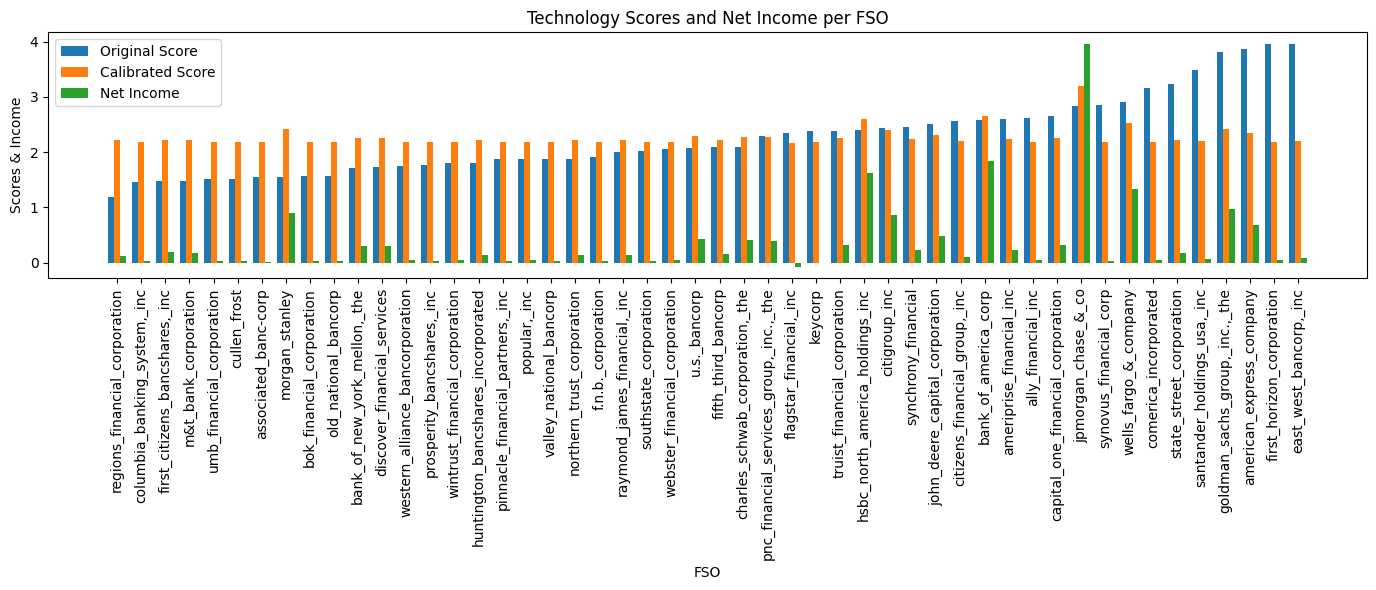

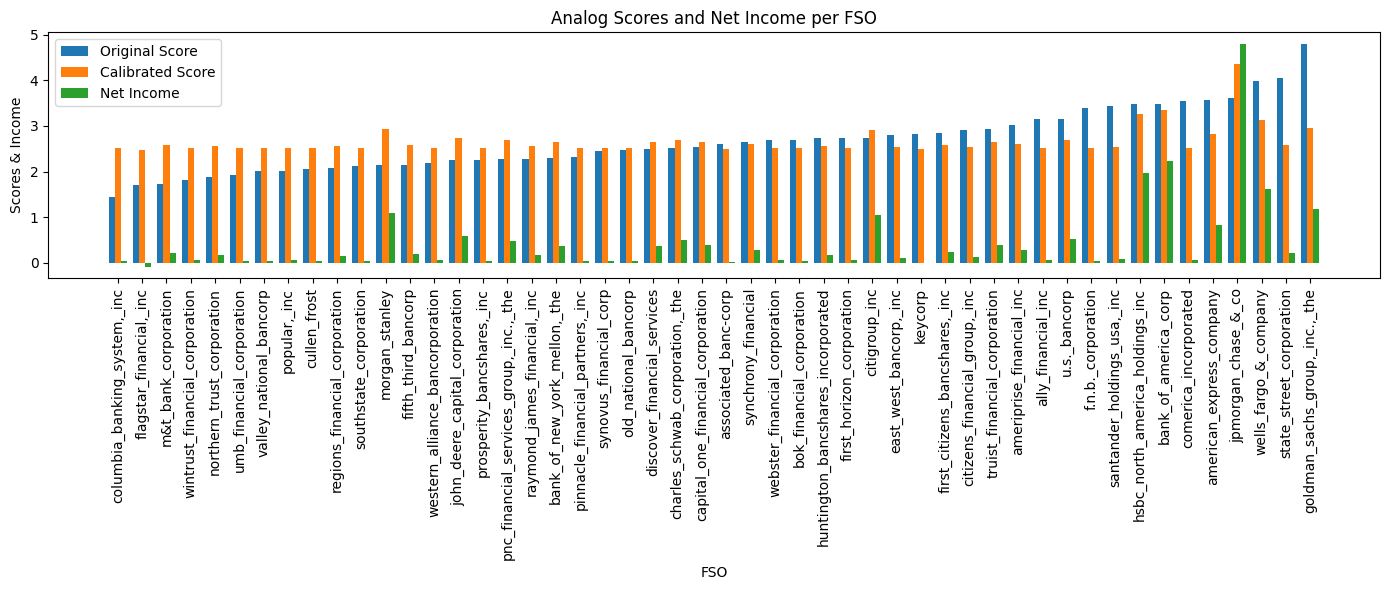

In [19]:
# Merge calibrated scores back with full data
plot_df = pd.merge(merged_df, result_df, on="bank_name")

# Plot each subcategory
for sub in subcategories:
    df = plot_df[plot_df['sub_category'] == sub].sort_values(by='final_score')
    plt.figure(figsize=(14, 6))
    bar_width = 0.25
    index = np.arange(len(df))

    # Normalize income to match score range
    normalized_income = df['2024 Net Income'] / df['2024 Net Income'].max() * df[['final_score', f'{sub}_calibrated_score']].max().max()

    # Plot bars
    plt.bar(index, df['final_score'], bar_width, label='Original Score')
    plt.bar(index + bar_width, df[f'{sub}_calibrated_score'], bar_width, label='Calibrated Score')
    plt.bar(index + 2 * bar_width, normalized_income, bar_width, label='Net Income')

    # Labels and layout
    plt.xticks(index + bar_width, df['bank_name'], rotation=90)
    plt.title(f'{sub} Scores and Net Income per FSO')
    plt.xlabel('FSO')
    plt.ylabel('Scores & Income')
    plt.legend()
    plt.tight_layout()
    plt.show()
